In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Loading dataset
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [2]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
train_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [4]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
test_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
# Checking for class imbalance
print(train_data['is_fraud'].value_counts())
print(test_data['is_fraud'].value_counts())


is_fraud
0    1289169
1       7506
Name: count, dtype: int64
is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [9]:
# separating the data for analysis
legit = train_data[train_data.is_fraud == 0]
fraud = train_data[train_data.is_fraud == 1]


In [10]:
print(legit.shape)
print(fraud.shape)

(1289169, 23)
(7506, 23)


In [11]:
# statistical measures of the data
legit.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [12]:
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [13]:
# Selecting only the numeric columns
numeric_columns = train_data.select_dtypes(include=['number']).columns

print(numeric_columns)
# Grouping by 'is_fraud' and calculating the mean for numeric columns only
mean_values = train_data.groupby('is_fraud')[numeric_columns].mean()

print(mean_values)


Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
             Unnamed: 0        cc_num         amt           zip        lat  \
is_fraud                                                                     
0         648473.169029  4.172901e+17   67.667110  48805.107481  38.536888   
1         624949.724354  4.003577e+17  531.320092  48038.714229  38.663609   

               long      city_pop     unix_time  merch_lat  merch_long  \
is_fraud                                                                 
0        -90.228142  88775.228137  1.349249e+09  38.536659  -90.228274   
1        -89.916041  97276.763256  1.348389e+09  38.653901  -89.915808   

          is_fraud  
is_fraud            
0              0.0  
1              1.0  


In [14]:
# Standardizing the 'amt' and 'trans_date_trans_time' (or 'unix_time') features
train_data['amt'] = StandardScaler().fit_transform(train_data['amt'].values.reshape(-1, 1))
train_data['unix_time'] = StandardScaler().fit_transform(train_data['unix_time'].values.reshape(-1, 1))
test_data['amt'] = StandardScaler().fit_transform(test_data['amt'].values.reshape(-1, 1))
test_data['unix_time'] = StandardScaler().fit_transform(test_data['unix_time'].values.reshape(-1, 1))


In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector

In [16]:
# Checking for missing values
print(train_data.isnull().sum())


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [17]:
#train_data
train_data['unix_time1'] = pd.to_datetime(train_data['trans_date_trans_time']).astype('int64') // 10**9
# owncast to int32 
train_data['unix_time1'] = train_data['unix_time1'].astype('int32')
#test_data
test_data['unix_time1'] = pd.to_datetime(test_data['trans_date_trans_time']).astype('int64') // 10**9
# downcast to int32
test_data['unix_time1'] = test_data['unix_time1'].astype('int32')

In [18]:
# droping the original date column
train_data = train_data.drop(columns=['trans_date_trans_time','Unnamed: 0'])
test_data = test_data.drop(columns=['trans_date_trans_time','Unnamed: 0'])


In [19]:
y = train_data['is_fraud']
X = train_data

X_test = test_data
Y_test =test_data['is_fraud']

In [20]:
# Finding indices where Y_test is 1 (fraudulent cases)
fraud_indices = np.where(Y_test == 1)[0]

# Using these indices to select the corresponding rows from X_test
fraud_cases = X_test.iloc[fraud_indices]

# Printing the rows with column headings
print(fraud_cases)


                  cc_num                             merchant        category  \
1685    3560725013359375                 fraud_Hamill-D'Amore  health_fitness   
1767    6564459919350820    fraud_Rodriguez, Yost and Jenkins        misc_net   
1781    6564459919350820                     fraud_Nienow PLC   entertainment   
1784    4005676619255478  fraud_Heathcote, Yost and Kertzmann    shopping_net   
1857    3560725013359375               fraud_Hermann and Sons    shopping_pos   
...                  ...                                  ...             ...   
517197  2242176657877538      fraud_Willms, Kris and Bergnaum    shopping_pos   
517274  2242176657877538                       fraud_Kuhn LLC    shopping_pos   
517341  2242176657877538  fraud_Mosciski, Ziemann and Farrell    shopping_net   
517529  2242176657877538                   fraud_Bauch-Raynor     grocery_pos   
517571  2242176657877538           fraud_Jaskolski-Vandervort        misc_net   

             amt    first  

In [21]:
# Defining the feature matrix and target variable
X = train_data.drop(columns='is_fraud')

X_test = test_data.drop(columns='is_fraud')


In [22]:
numeric_columns = X.select_dtypes(include=['number']).columns

In [23]:
print("Before preprocessing:")
print(f"X_train shape: {X.shape}")
print(f"Y_train shape: {y.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

Before preprocessing:
X_train shape: (1296675, 21)
Y_train shape: (1296675,)
X_test shape: (555719, 21)
Y_test shape: (555719,)


In [24]:
X.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,unix_time1
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,-0.407826,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,-1.858664,36.011293,-82.048315,1546300818
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.230039,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,-1.858662,49.159047,-118.186462,1546300844
2,38859492057661,fraud_Lind-Buckridge,entertainment,0.934149,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,-1.858662,43.150704,-112.154481,1546300851
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,-0.158132,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,-1.858660,47.034331,-112.561071,1546300876
4,375534208663984,fraud_Keeling-Crist,misc_pos,-0.177094,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,-1.858651,38.674999,-78.632459,1546300986


In [25]:
print("Before preprocessing:")
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

Before preprocessing:
X shape: (1296675, 21)
Y shape: (1296675,)


In [26]:
from sklearn.compose import make_column_selector as selector
# Preprocessing: handling categorical and numerical data
numeric_features = selector(dtype_include=['int64', 'float64'])
categorical_features = selector(dtype_include=object)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [27]:
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Assuming X_train and X_test are not DataFrames, convert them
X_train = pd.DataFrame(X, columns=numeric_columns)
X_test = pd.DataFrame(X_test, columns=numeric_columns)

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), make_column_selector(dtype_include='number')),
        ('cat', OneHotEncoder(), make_column_selector(dtype_include='object'))
    ]
)

In [28]:
print(X)

                      cc_num                             merchant  \
0           2703186189652095           fraud_Rippin, Kub and Mann   
1               630423337322      fraud_Heller, Gutmann and Zieme   
2             38859492057661                 fraud_Lind-Buckridge   
3           3534093764340240   fraud_Kutch, Hermiston and Farrell   
4            375534208663984                  fraud_Keeling-Crist   
...                      ...                                  ...   
1296670       30263540414123                    fraud_Reichel Inc   
1296671     6011149206456997             fraud_Abernathy and Sons   
1296672     3514865930894695                 fraud_Stiedemann Ltd   
1296673     2720012583106919  fraud_Reinger, Weissnat and Strosin   
1296674  4292902571056973207  fraud_Langosh, Wintheiser and Hyatt   

              category       amt        first       last gender  \
0             misc_net -0.407826     Jennifer      Banks      F   
1          grocery_pos  0.230039    S

In [29]:
print(y)

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64


In [30]:
X = train_data.select_dtypes(exclude=['object', 'datetime'])
X_test= test_data.select_dtypes(exclude=['object', 'datetime'])

In [31]:
print(X.shape)
print(X_test.shape)

(1296675, 11)
(555719, 11)


In [32]:
print("Before preprocessing:")
print(f"X_train shape: {X.shape}")
print(f"Y_train shape: {y.shape}")


Before preprocessing:
X_train shape: (1296675, 11)
Y_train shape: (1296675,)


In [33]:
X= X.select_dtypes(exclude=['object', 'datetime'])
X_test = X_test.select_dtypes(exclude=['object', 'datetime'])

In [34]:
print("Before preprocessing:")
print(f"X_train shape: {X.shape}")
print(f"Y_train shape: {y.shape}")
print(numeric_columns)
print(X)

Before preprocessing:
X_train shape: (1296675, 11)
Y_train shape: (1296675,)
Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'unix_time1'],
      dtype='object')
                      cc_num       amt    zip      lat      long  city_pop  \
0           2703186189652095 -0.407826  28654  36.0788  -81.1781      3495   
1               630423337322  0.230039  99160  48.8878 -118.2105       149   
2             38859492057661  0.934149  83252  42.1808 -112.2620      4154   
3           3534093764340240 -0.158132  59632  46.2306 -112.1138      1939   
4            375534208663984 -0.177094  24433  38.4207  -79.4629        99   
...                      ...       ...    ...      ...       ...       ...   
1296670       30263540414123 -0.341769  84735  37.7175 -112.4777       258   
1296671     6011149206456997 -0.116339  21790  39.2667  -77.5101       100   
1296672     3514865930894695  0.221930  88325  32.9396 -105.8189       899   
1

In [35]:
if not isinstance(X, pd.DataFrame):
    X_train1 = pd.DataFrame(X, columns=numeric_columns)


In [36]:
import joblib
# Apply the preprocessing pipeline
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
preprocessor = joblib.dump(preprocessor,'preprocessor.pkl')

In [37]:
# Checking final shapes to ensure alignment
print(f"Processed X_train shape: {X_train.shape}")
print(f"Y_train shape: {y.shape}")
print(f"Processed X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

Processed X_train shape: (1296675, 10)
Y_train shape: (1296675,)
Processed X_test shape: (555719, 10)
Y_test shape: (555719,)


In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=54)
X_train, y_train = smote.fit_resample(X_train,y)


In [39]:
print(f"Processed X_train shape: {X_train.shape}")
print(f"Y_train shape: {y_train.shape}")

Processed X_train shape: (2578338, 10)
Y_train shape: (2578338,)


In [40]:
print(X.shape, X_train.shape, X_test.shape)

(1296675, 11) (2578338, 10) (555719, 10)


In [41]:
# Assuming the array's shape is known and corresponds to some known column order
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Now you can use select_dtypes
numeric_columns = X_test.select_dtypes(include=['number']).columns

In [42]:
print(numeric_columns)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


In [43]:
print(type(Y_test))


<class 'pandas.core.series.Series'>


In [44]:
if isinstance(Y_test, pd.DataFrame):
    print(Y_test.head())
elif isinstance(Y_test, pd.Series):
    print(Y_test.head())


0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64


In [45]:
# Training
# Training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=52)
decision_tree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=52)

In [46]:
# Training the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=52)
random_forest.fit(X_train,y_train)



RandomForestClassifier(criterion='entropy', random_state=52)

In [47]:
# Training the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=52)
logistic_regression.fit(X_train,y_train)


LogisticRegression(max_iter=1000, random_state=52)

In [53]:
models = {
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Logistic Regression": logistic_regression
}

best_model = None
best_auc = 0

for name, model in models.items():
    y_pred = model.predict(X_test)
    auc = roc_auc_score(Y_test, y_pred)
    
    print(f"{name}:")
    print(confusion_matrix(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))
    print(f"AUC: {auc}\n")
    
    if auc > best_auc:
        best_auc = auc
        best_model = model


Decision Tree:
[[530998  22576]
 [  1642    503]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.02      0.23      0.04      2145

    accuracy                           0.96    555719
   macro avg       0.51      0.60      0.51    555719
weighted avg       0.99      0.96      0.97    555719

AUC: 0.5968582861630585

Random Forest:
[[552884    690]
 [  1768    377]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.35      0.18      0.23      2145

    accuracy                           1.00    555719
   macro avg       0.68      0.59      0.62    555719
weighted avg       0.99      1.00      0.99    555719

AUC: 0.5872555649673072

Logistic Regression:
[[526590  26984]
 [   532   1613]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.

In [55]:
# Saving the best model
import joblib
joblib.dump(best_model, 'fraud_detection_model.pkl')

print(f"Best model saved with AUC: {best_auc}")


Best model saved with AUC: 0.8516181440437275


In [57]:
model = joblib.load('fraud_detection_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')


Decision Tree (Default Threshold 0.5):
Accuracy: 0.9564204211121088
Precision: 0.02179470514320378
Recall: 0.2344988344988345
F1-score: 0.03988265144307009

Confusion Matrix:
 [[530998  22576]
 [  1642    503]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.02      0.23      0.04      2145

    accuracy                           0.96    555719
   macro avg       0.51      0.60      0.51    555719
weighted avg       0.99      0.96      0.97    555719


Decision Tree (Adjusted Threshold 0.3):
Accuracy: 0.9564204211121088
Precision: 0.02179470514320378
Recall: 0.2344988344988345
F1-score: 0.03988265144307009

Confusion Matrix (Adjusted):
 [[530998  22576]
 [  1642    503]]

Classification Report (Adjusted):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.02      0.23      0.04      2145

    accuracy 

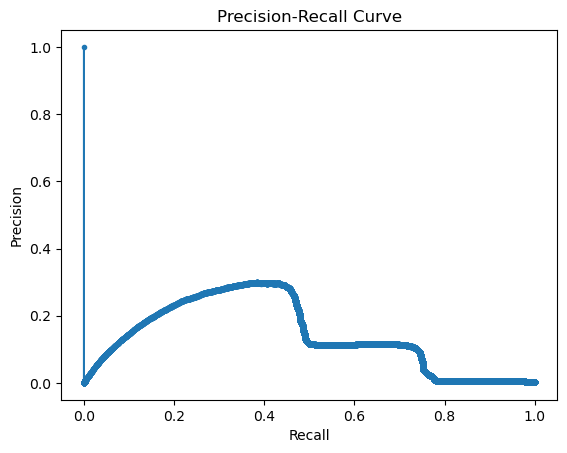

In [65]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# Defining models to train
models = {
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Logistic Regression": logistic_regression
}

best_model = None
best_metric = 0

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predicting the probabilities of the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Seting the default threshold to 0.5
    y_pred = (y_prob >= 0.5).astype(int)
    
    print(f"{name} (Default Threshold 0.5):")
    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print("Precision:", precision_score(Y_test, y_pred))
    print("Recall:", recall_score(Y_test, y_pred))
    print("F1-score:", f1_score(Y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
    print("\nClassification Report:\n", classification_report(Y_test, y_pred))
    
    # Adjusting the threshold, for example to 0.3 to reduce false negatives
    threshold = 0.3
    y_pred_adjusted = (y_prob >= threshold).astype(int)
    
    print(f"\n{name} (Adjusted Threshold 0.3):")
    print("Accuracy:", accuracy_score(Y_test, y_pred_adjusted))
    print("Precision:", precision_score(Y_test, y_pred_adjusted))
    print("Recall:", recall_score(Y_test, y_pred_adjusted))
    print("F1-score:", f1_score(Y_test, y_pred_adjusted))
    print("\nConfusion Matrix (Adjusted):\n", confusion_matrix(Y_test, y_pred_adjusted))
    print("\nClassification Report (Adjusted):\n", classification_report(Y_test, y_pred_adjusted))
    
    # Defining a range of thresholds to test
    thresholds = np.arange(0.0, 1.0, 0.01)
    f1_scores = []
    
    # Calculating F1-score for each threshold
    for threshold in thresholds:
        y_pred_temp = (y_prob >= threshold).astype(int)
        f1 = f1_score(Y_test, y_pred_temp)
        f1_scores.append(f1)
    
    # Find the threshold that gives the maximum F1-score
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"\n{name} (Best Threshold {best_threshold}):")
    
    # Predict using the best threshold
    y_pred_best = (y_prob >= best_threshold).astype(int)
    
    # Evaluating with the best threshold
    best_f1 = max(f1_scores)
    print("Best F1-score:", best_f1)
    print("\nConfusion Matrix (Best Threshold):\n", confusion_matrix(Y_test, y_pred_best))
    print("\nClassification Report (Best Threshold):\n", classification_report(Y_test, y_pred_best))
    
    # If this model is the best so far, save it
    if best_f1 > best_metric:
        best_metric = best_f1
        best_model = model

# Saving the best model
joblib.dump(best_model, 'fraud_detection_model.pkl')
print(f"\nBest model saved with F1-score: {best_metric}")

# Reloading the best model for future predictions
model = joblib.load('fraud_detection_model.pkl')

# Ploting Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
